In [1]:
%matplotlib inline
# Our standard data imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas.testing as pdt
import numpy.testing as npt

# Machine Learning Part I: Classification

Let's consider the second category of supervised learning problems from our machine learning lectures -- classification problems.  Specifically, we will use `Scikit-Learn` to implement and evaluate classification models on the MNIST handwritten digit dataset.  This is to serve as a reminder and expansion of some earlier work. Later, you will explore how to apply these machine learning ideas to graphs.

<a id = 'questions'></a>

+ [**Question 1**: Examining an image](#q1)
+ [**Question 2**: Counting the Classes](#q2)
+ [**Question 3**: Splitting the Data](#q3)
+ [**Question 4**: Binarizing the Target](#q4)
+ [**Question 5**: Baseline Confusion Matrix](#q5)
+ [**Question 6**: Accuracy Score](#q6)
+ [**Question 7**: Probability Table](#q7)
+ [**Question 8**: `StandardScaler`](#q8)
+ [**Question 9**: `Pipeline`](#q9)
+ [**Question 10**: Grid Search](#q10)
+ [**Question 11**: Decision Tree](#q11)
+ [**Question 12**: Adding Degree Feature](#q12)
+ [**Question 13**: Clustering Coefficients](#q13)
+ [**Question 14**: Big Influencers](#q14)
+ [**Question 15**: Adding distance features (I)](#q15)
+ [**Question 16**: Adding distance features (II)](#q16)
+ [**Question 17**: `LogisticRegression`](#q17)
+ [**Question 18**: Larger Example](#q18)
+ [**Question 19**: Structuring the Data](#q19)
+ [**Question 20**: Training a Classifier](#q20)
+ [**Question 21**: Bagging Classifiers](#q21)
+ [**Question 22**: Boosting Classifiers](#q22)

## Examining the Digits data set

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

# Extract data and targets as Numpy arrays
X, y = digits.data, digits.target
print('Input data shape: {}\tTarget data shape: {}'.format(X.shape, y.shape))

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

To get a better feel of what the input data is, let's extract a row of 64 numbers, reshape it into an $8\times8$ array, and examine the resulting matrix by printing the numeric values & by plotting it as an image. 

[[ 0.  0.  2. 12.  9.  0.  0.  0.]
 [ 0.  0. 11. 15. 12.  5.  0.  0.]
 [ 0.  0. 15.  5.  0. 14.  0.  0.]
 [ 0.  2. 15.  1.  0.  9.  7.  0.]
 [ 0.  4. 10.  0.  0.  7.  8.  0.]
 [ 0.  0. 12.  0.  0.  8. 10.  0.]
 [ 0.  2. 15.  5. 10. 16.  1.  0.]
 [ 0.  0.  5. 14. 12.  4.  0.  0.]]
y_130 = 0


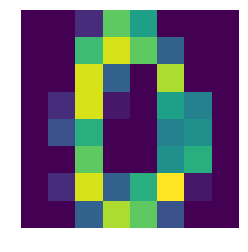

In [3]:
k = 130
im = X[k].reshape(8, 8)
print(im)
plt.imshow(im)
plt.axis('off')
print('y_{} = {}'.format(k, y[k]))

Apparently, row 130 of the matrix `X` (remember, indexed from zero, this is the 131st row from the top), when reshaped, yields the image above. The corresponding entry of the target vector `y` is $0$ which means that this image is intended to represent the numeral $0$. Whether this is obvious depends on the handwriting of the original author.

[Back to top](#questions)

---

<a id='q1'></a>
### Question 1: Examining a Digit

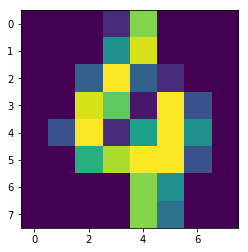

This is an image of the digit 4.


In [4]:
### GRADED
## Plot the image from row 100 of the matrix X.
## What numeral does this image represent?
## Assign your response as an integer to the identifier ans_1
## e.g., ans_1 = 9
k = 100
y = digits.target
ans_1 = 4
image_digit = X[k].reshape(8, 8)
plt.imshow(image_digit)
plt.show()
print('This is an image of the digit {}.'.format(ans_1))

In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

## Target Variables

In classification problems, the labels (or targets) are *discrete* or *categorical* values (by contrast with regression problems). That being the case, we generally prefer the labelled data to be *balanced*; that is, we prefer having a uniform distribution of labels from which to build our models. For a binary classification problem (i.e., one with two classes), that would mean 50% of the data is from one class and 50% of the data from the other class. For a classification problem with $k$ classes, that would mean each class is represented in $(100 \div k)$% of the data.

Examining the target vector `y` for the MNIST digits data, it appears that each numeral from the sequence `0` through `9` occurs in a random sequence:

In [6]:
y = digits.target
print(y[31:60])

[9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3]


[Back to top](#questions)

---

<a id='q2'></a>
### Question 2: Counting the Target

Your task here is to summarize how often each digit from `0` through `9` occurs in the vector `y`. The result be a Pandas Series with the integers `0` though `9` as the index (sorted in increasing order) and the corresponding counts as the data.

(Hint: the Pandas Series method `value_counts` can do this easily, as can the Numpy function `unique`).

In [7]:
## Graded
## Create a Pandas Series with a sorted index 
## of the numerals 0 through 9. 
## The corresponding values are the counts of the
## occurrences of each digit in the vector y from
## the MNIST digits dataset.
## Assign the result to the identifier digit_counts

test = pd.Series(y)
digit_counts = test.value_counts().sort_index()

In [8]:
digit_counts

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64

In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

## Train/Test Split

From Question 2, it seems the MNIST digits data set is fairly balanced; each of the 10 possible digits occurs roughly 180 times. As with regression problems, we want to divide the data into training and testing sets. The easiest way to do so is using the function `train_test_split` from the Scikit-Learn submodule `sklearn.model_selection` (you can consult the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to learn how to customize the behavior of this function).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

[Back to top](#questions)

---

<a id='q3'></a>
### Question 3: Splitting the Data

Your task here is to create a Pandas DataFrame with the digits from $0$ through $9$ in ascending order as the index and with two columns: `train_counts` and `test_counts`. The entries of each row, then, are the number of occurrences of that digit in the training target `y_train` and the testing target `y_test` respectively. Bind the DataFrame to the identifier `split_digit_counts`.

In [11]:
## GRADED
## As in Question 2, count the occurrences of each digit,
## but this time in the training & the testing data sets 
## (i.e., in y_train and y_test).
## Assemble the results into a Pandas DataFrame with index
## values 0 to 9 (sorted in ascending order) and with two
## columns: train_counts & test_counts.
## That is, your final DataFrame should have these headings:
##        | train_counts | test_counts | 
## =======================================
## Digits | 
## Assign the DataFrame to the identifier split_digit_counts
###
### YOUR CODE HERE
###

test1 = pd.Series(y_train)
test2 = pd.Series(y_test)
train_counts = test1.value_counts().sort_index()
test_counts = test2.value_counts().sort_index()
frame = { 'train_counts': train_counts, 'test_counts': test_counts } 
split_digit_counts = pd.DataFrame(frame)

In [12]:
split_digit_counts

,train_counts,test_counts
0,135,43
1,145,37
2,139,38
3,137,46
4,126,55
5,123,59
6,136,45
7,138,41
8,136,38
9,132,48


In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

## Binary classification

To begin, we will turn this into a binary classification problem.  We'll focus specifically on identifying occurrences of the digit `9` wherever it occurs.  For this simpler binary classification problem, we need to change every value in the vector `y` to `1` or `0` according to whether it is `9` or not. That is, replace every occurrence of `9` in the vector  `y` with the value `1`; replace all other values with `0`. This process is called *binarization*.

[Back to top](#questions)

---

<a id='q4'></a>
### Question 4: Binarizing the Target

Your task here is to create three new arrays: `y_bin`, `y_bin_train`, and `y_bin_test`. These will be binary vectors with `1`s replacing `9`s in `y`, `y_train`, and `y_test` respectively. All other entries will be replaced by `0`s.

(Hint: The Numpy function `where` is very useful in this context).

In [14]:
## GRADED
## Binarize the vectors y, y_train, &  y_test as described above. 
## Save the results as y_bin, y_bin_train, and y_bin_test respectively.
y_bin = [1 if item == 9 else 0 for item in y]
y_bin_train = [1 if item == 9 else 0 for item in y_train]
y_bin_test = [1 if item == 9 else 0 for item in y_test]


In [15]:
y_bin[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [16]:
y_bin_test[:20]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [17]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

### DummyClassifier

To begin, we'll apply the built-in [`DummyClassifier` class from `sklearn.dummy`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) to set a baseline for performance of our future models.  This classifier does not actually use the feature matrix `X`; classification decisions are made using the target vector `y` only.  There are a few permissible strategies, but we'll start with the `'most_frequent'` strategy.  That is, the `predict` method always returns the majority class. For our binary digit classification problem, this would be `0` (because the `1` classification is reserved for `9`s and most of the digits are not `9`s).

In [18]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_bin_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Having applied the `fit` method to the training data, we can use the `predict` method to see how this estimator classifies the data. Unsurprisingly, it returns a vector of all `0`s (because that is the majority class for this data).

In [19]:
y_bin_pred = dummy.predict(X_test)
print(y_bin_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


We can compute the fraction of correct classifications using the method `score` with the test data:

In [20]:
score = dummy.score(X_test, y_bin_test)
print('The fraction of correct classifications is: {}'.format(score))

The fraction of correct classifications is: 0.8933333333333333


Using `dummy.score` is equivalent to explicitly comparing the entries of `y_bin_pred` to `y_bin_test`, counting the number of correct classifications, and dividing by the number of classifications in total. 

In [21]:
# This is the long way of computing the accuracy score
correct_classifications = (y_bin_pred == y_bin_test)
score = correct_classifications.sum() / len(correct_classifications)
print('The fraction of correct classifications is: {}'.format(score))

The fraction of correct classifications is: 0.8933333333333333


For classification problems, a *confusion matrix* is a more detailed description of the accuracy of a classifier. It contains entries for the actual values as rows and predicted values as columns. This means we have:

| $~$ | predicted 0 | predicted 1 |
| ---- | ----------- | ---------- |
| **actual 0** |  true negative | false positive |
| **actual 1** |  false negative | true positive |



In *Scikit-Learn*, the `confusion_matrix` function takes as arguments the actual labels followed by the predicted labels (labelled in ascending order according to the class labels). From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

> `sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)`
>
> Compute confusion matrix to evaluate the accuracy of a classification
>
> By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.
>
> Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$, and false positives is $C_{0,1}$.

[Back to top](#questions)

---

<a id='q5'></a>
### Question 5: Baseline Confusion Matrix

Your task here is to generate the confusion matrix associated with the test data for this digits binary classification problem (i.e., computing which images correspond to the digit `9` and which do not). You can do so explicitly or you can use the function `confusion_matrix` from `sklearn.metrics` according to your preference.

In [22]:
## GRADED
## Use the training data (X_train, y_bin_train) to fit a DummyClassifier class
## instance to the training data. Then, construct a prediction from the test
## input features X_test and, by comparing to the test labels y_bin_test,
## build the corresponding confusion matrix.
## Assign the resulting 2D Numpy array to the identifier bin_confusion_mat
from sklearn.metrics import confusion_matrix
bin_confusion_mat = confusion_matrix(y_bin_test, y_bin_pred, labels=None, sample_weight=None)


In [23]:
bin_confusion_mat

array([[402,   0],
       [ 48,   0]])

In [24]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

## Accuracy

The most basic way to assess our performance is to compare how many predictions we were right on out of the total number of observations.  We refer to this as **accuracy**. Using the diagram of our confusion matrix above, we have the formula

$$\text{accuracy} = \frac{\text{tp} + \text{tn}}{\text{tn} + \text{tp} + \text{fn} + \text{fp}}$$

where $\text{tp}$ is the number of true positives, $\text{tn}$ is the number of true negatives, $\text{fp}$ is the number of false positives, and $\text{fn}$ is the number of false negatives.

[Back to top](#questions)

---

<a id='q6'></a>
### Question 6: Accuracy Score

Your task here is to compose a function `accuracy_score` that implements the preceding formula. The input to the function is a (previously computed) confusion matrix and the output is an accuracy score.

In [25]:
## GRADED
## Fill in the function accuracy_score below
def accuracy_score(confusion_matrix):
    '''
    This function takes in a confusion matrix 
    (from a binary classification problem)
    and returns the accuracy score.
    '''
###
### Insert your solution here:
###
    tn = confusion_matrix[0][0]
    tp =  confusion_matrix[1][1]
    fn =  confusion_matrix[1][0]
    fp =  confusion_matrix[0][1]
    
    accuracy = (tp + tn) / (tp + tn +fp + fn)
    
    return accuracy


In [26]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

## Logistic Regression

We move on now to estimators for classification problems that actually use the input data (unlike the `DummyClassifier`).  To begin, let's examine the [`LogisticRegression` estimator](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression). In order to determine a logistic regression model, a nonlinear system of equations needs to be solved iteratively; thus, when we instantiate the esitmator, we can specify the solver and the maximum number of iterations. For instance:

```python
>>> from sklearn.linear_model import LogisticRegression
>>> clf = LogisticRegression(solver='newton-cg', max_iter=1000)
```
Don't worry about what these particular optional parameters mean; other choices exist, but we'll use these for now.

As with other *Scikit-Learn*'s estimator classes, the `.fit` and `.predict` methods are used to construct the model and make predictions.

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'newton-cg', max_iter=1000)
clf.fit(X_train, y_bin_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
y_pred = clf.predict(X_test)
y_pred[335:350] # Some zeros, some ones

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

For classifications, we can also access the *probabilities* of correctness. That is, for a given observation (i.e., row of `X`), there is not only the class prediction (i.e., corresponding row of `y`), but there are associated *probabilities of that observation belonging to each class*. These probabilites are accessible by the method `predict_proba`; for each observation, this returns a row vector of nonnegative values that sum to 1 where the entry in column $k$ is the probability of belonging to class $k$. Thus, for this binary classification problem, after fitting a classifier (e.g., `LogisticRegression`) to the training data, the method `predict_proba` returns an $n_{\text{test}}\times2$ matrix of probabilities (where $n_{\text{test}}$ is the number of observations in the testing set) whose rows all sum to one.

In [29]:
# Column 0: probability of class 0
# Column 1: probability of class 1
clf.predict_proba(X_test)[335:350]

array([[9.99999959e-01, 4.10997907e-08],
       [9.99999993e-01, 7.12241276e-09],
       [2.96719734e-05, 9.99970328e-01],
       [9.99360893e-01, 6.39106742e-04],
       [1.00000000e+00, 2.37444399e-13],
       [9.99999999e-01, 8.59788264e-10],
       [1.00000000e+00, 8.11224424e-20],
       [1.00000000e+00, 1.32083885e-18],
       [1.00000000e+00, 1.04424196e-13],
       [9.99833326e-01, 1.66673691e-04],
       [6.20547414e-06, 9.99993795e-01],
       [9.99999998e-01, 1.90973646e-09],
       [8.90569008e-06, 9.99991094e-01],
       [9.99999910e-01, 9.00967374e-08],
       [1.00000000e+00, 7.59819522e-11]])

[Back to top](#questions)

---

<a id='q7'></a>
### Question 7: Probability Table

Your task here is to  construct a function `prob_table` encapsulating the previous computations. It accepts the test data `X_test`, and `y_test`, followed by a classifier (e.g., `DummyClassifier`, `LogisticRegression`, etc.) as arguments. The classifier should already have been fit to data (e.g., `classifier.fit(X_train, y_train)` should already have been invoked). The result returned should be a DataFrame:



|  $~$ | prob_0 | prob_1 | predicted_value | actual_value |
| ---- | ----------- | ----------- | ------------------ | ------------ |
| **0** |  $p_0$ | ($1-{}$ $p_0$) | $y^{\text{pred}}_0$ | $y^{\text{test}}_{0}$ |
| **1** |  $p_1$ | ($1-{}$ $p_1$) | $y^{\text{pred}}_1$ | $y^{\text{test}}_{1}$ |
| $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ | $\vdots$ |



In [30]:
### GRADED
## Complete the prob_table function below
def prob_table(X_test, y_test, classifier):
    '''
    This function takes in a test set X_test, y_test,
    and a classifier (that has been fit to data)
    It returns a DataFrame with columns below:
    | probab_0 | probab_1 | predicted_value | actual_value |
    ========================================================
    '''
###
### Insert your solution here:
###
    y_pred = classifier.predict(X_test)
    prob_0 = [item[0] for item in classifier.predict_proba(X_test)] 
#     prob_1 = [item[1] for item in classifier.predict_proba(X_test)] 
    prob_1 = [1 - item for item in prob_0 ]
    actual_value = y_test
    
    data = list(zip(prob_0, prob_1, y_pred, actual_value))
    
    df = pd.DataFrame(data, columns = ['prob_0', 'prob_1', 'predicted_value', 'actual_value']) 
    return df

In [31]:
testit = prob_table(X_test, y_bin_test, clf)

In [32]:
testit.head()

,prob_0,prob_1,predicted_value,actual_value
0,1.000000,3.245606e-09,0,0
1,0.000027,9.999734e-01,1,1
2,0.999997,2.593563e-06,0,0
3,0.989061,1.093936e-02,0,0
4,1.000000,5.865308e-13,0,0


In [33]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

## Standardizing the data

Prior to fitting a given estimator to data, we usually want to *standardize* the data. This is usually done by replacing features with their respective *z-scores*. That is, we translate and rescale the data so that the $k$th feature $x_k$ is replaced according to the substitution $x_k \leftarrow (x_k - \mu_k) / \sigma_k$ where $\mu_k$ is the (empirical) mean of the $k$th feature and $\sigma_k$ is the (empirical) standard deviation of the $k$th feature. When working with testing and training data sets, the values of $\mu_k$ and $\sigma_k$ are determined using the training data and those same values are used to standardize the test data when validating the resulting estimator.

All of the above can be achieved using the [`StandardScaler` class from `sklearn.preprocessing`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instances of this class can accept a matrix of observations and return the corresponding z-scores down each column (remember, the rows are observations and the columns are the features). The resulting `StandardScalar` object, once fit to the training data, can be used to transform the testing data as well.

Here's an example of how to use the `StandardScaler` class to transform data:
```python
>>> from sklearn.preprocessing import StandardScaler
>>> data = np.array([[0, 0], [0, 1], [1, 1], [1, 1]]) # Create 4x2 array of data
>>> scaler = StandardScaler() # Instantiate StandardScaler object
>>> scaler.fit(data)          # Use columns from data to define transformation
>>> print(scaler.mean_)       # means of 2 columns from data
[0.5  0.75]
>>> print(scaler.var_)        # variances of 2 columns from data
>>> print(scaler.transform(data))  # Applying transformation to data
[[-1.         -1.73205081]
 [-1.          0.57735027]
 [ 1.          0.57735027]
 [ 1.          0.57735027]]
>>> print(scaler.transform([[2, 2]]))  # Applying transformation to new observation
[[3.         2.88675135]]
```
As an alternative to applying the methods `fit` and then `transform`, there is a `fit_transform` method that combines the two into a single step.

[Back to top](#questions)

---

<a id='q8'></a>
### Question 8: `StandardScaler`

Your task here is to standardize the data using the `StandardScalar` class as above. You'll define the transformation to the training feature matrix `X_train` with the `fit` method. You'll apply the resulting transformation to `X_train` and `X_test` to yield standardized data for both the training and testing sets. From there, you'll define a `LogisticRegression` classifier and fit that to the standardized training feature matrix and the binary labels `y_bin_train`. Finally, you'll use the function `prob_table` from Question 7 to create a DataFrame `prob_table_standardized` that shows the classifications using the standardized test data as compared to the actual classifications with their corresponding probabilities.

In [34]:
### GRADED
## Use the StandardScalar class to transform the training & test data
## X_train & X_test. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_T = scaler.transform(X_train)
X_test_T = scaler.transform(X_test)

## Then, instantiate a LogisticRegression and fit it to the transformed training data. 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cg', max_iter = 1000)
logreg.fit(X_train_T, y_bin_train)

## Finally, use the resulting classifier and the transformed test data as inputs to the prob_table function from Question 19.
## Assign the resulting DataFrame to prob_table_standardized

prob_table_standardized = prob_table(X_test_T, y_bin_test, logreg)


In [35]:
prob_table_standardized.head()

,prob_0,prob_1,predicted_value,actual_value
0,0.999113,0.000887,0,0
1,0.011709,0.988291,1,1
2,0.996751,0.003249,0,0
3,0.833471,0.166529,0,0
4,0.999996,0.000004,0,0


In [40]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

### Using Pipelines

Many modeling tasks involve the combination of preprocessing steps that are fed into an estimator.  As such, *Scikit-Learn* comes with a handy `Pipeline` module that allows us to combine *transformers* (e.g., `StandardScaler`) and *estimators* (e.g., `LinearRegression`, `LogisticRegression`, etc.) in a single object.  The `Pipeline` expects a sequence of transformers -- objects that have methods `fit`, `transform`, & `fit_transform` -- and ends with an estimator -- objects that have methods `fit`, `predict`, & `fit_predict`.  For example, we could have a `Pipeline` that scales our data as in Question 20 and subsequently fits a `LogisticRegression` model as follows:

```python
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000, solver='newton-cg'))])
```

Notice that the `Pipeline` object is instantiated using a list of tuples; all the tuples consist of a string identifier followed by an instance of one of Scikit-Learn's transformer classes except the last tuple (which has an estimator class instance instead). The resulting `Pipeline` object bechaves like an estimator (i.e., it has methods `fit`. `predict`, and `fit_predict`).

[Back to top](#questions)

---

<a id='q9'></a>
### Question 9: `Pipeline`

Your task here is to construct a `Pipeline` object as described above for a binary classification problem. We'll load and prepare the data `X` and `y` for you (`y` is a binary vector distinguishing the digit `3` from all other digits).

In [41]:
### GRADING
## Construct a pipeline object called pipe combining a StandardScaler transformation with
## a LogisticRegression estimator. Fit the resulting pipelined estimator's to the training
## data X_train & y_train (provided) and construct a vector y_pred using the predict method
## of the Pipeline.
## Be sure your solution binds a suitable Pipeline object to the identifier pipe &
## a Numpy array to the identifier y_pred.
from sklearn.pipeline import Pipeline
digits = load_digits()
X, y = digits.data, np.where(digits.target==3, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000, solver='newton-cg'))])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)


In [42]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

## Regularization

As with linear regression, we can use *regularization* in conjunction with logistic regression. That is, we can modify the objective function being minimized to construct the estimator with a penalty term. From the [Scikit-Learn User guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):

> As an optimization problem, binary class $L2$ penalized logistic regression minimizes the following cost function:
>    $$\min_{w,c} \frac{1}{2}w^Tw + C\sum_{i=1}^{n}\log\left(\exp\left(-y_i\left(X_{i}^{T}w+c\right)\right)+1\right).$$
> Similarly, $L1$ regularized logistic regression solves the following optimization problem
>    $$\min_{w,c} \left\|w\right\|_{1} + C\sum_{i=1}^{n}\log\left(\exp\left(-y_i\left(X_{i}^{T}w+c\right)\right)+1\right).$$
> Note that, in this notation, it's assumed that the observation $y_i$ takes values in the set $\{-1,1\}$ at trial.

Ignoring the mathematical details of all the terms in these objective functions, the regularization parameter in the Scikit-Learn `LogisticRegression` estimator is labelled `C` consistent with the parameter $C$ in the equations above. Loosely speaking, $C$ controls the relative importance of the penalty term (the terms $w^Tw$ or $\|w\|_1$ in each of the objective functions) and the unpenalized objective (the expression preceded by $C$). So, when $C$ is small, the coefficients in $w$ that determine the logistic regressor are penalized more strongly forcing the penalty term to be smaller.

In practice with *Scikit-Learn*, we instantiate a `LogisticRegression` instance using the keyword option `C`. For our purposes, this means (when we use the `max_iter` and `solver` parameters as before) the following code for instantiation:

```python
>>> clf = LogisticRegression(C=100, max_iter=1000, solver='newton-cg')
```

[Back to top](#questions)

---

<a id='q10'></a>
### Question 10: Grid Search

Your task here is to embed the computation from Question 21 in a function called `log_reg_gridsearch`. The function `log_reg_gridsearch` accepts as input arguments the input feature matrix `X`, the target vector `y`, and a list `C_vals` of positive scalar values (for the regularization parameter $C$ in regularized logistic regression).

The input data is split into training & test sets with a fixed random parameter 42 (done for you).
From there, your function will loop over the values `c_val` within the list `C_vals`. For each value, you will:
* instantiate a `Pipeline` object with a `StandardScaler` object followed by a `LogisticRegression` object
* the `LogisticRegression` estimator is instantiated with keyword arguments `solver='newton-cg'`, `max_iter=1000`, and `C=c_val`
* the `Pipeline` is fit to the training data `X_train` & `y_train`
* the `Pipeline` is used to predict target values from the test data `X_test`
* the accuracy score (as computed using the estimator `score` method or the function `accuracy_score`
  from Question 18)

The result returned by the function is a DataFrame with two columns: `'C'` and `'accuracy'`. The column `'C'` contains the elements of the input list `C_vals`. The column `'accuracy'` contains the corresponding accuracy score as computed in the loop just described.

In [43]:
def log_reg_gridsearch(X, y, C_vals):
    '''
    Input: predictor X values, target y values, and a list of
    values for C in the LogisticRegression estimator.
    
    Output: DataFrame with accuracy scores & C values
    '''
    # DO NOT CHANGE THE LINE BELOW
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
###
### Insert your solution here:
###
    acc_list = []
    for val in C_vals:
        pipe = Pipeline([('scaler', StandardScaler()), 
                     ('clf', LogisticRegression(max_iter=1000, solver='newton-cg', C=val))])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
    
        CM = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
        accuracy = accuracy_score(CM)
        acc_list.append(accuracy)
    
    data = list(zip(C_vals, acc_list))
#     print(data)
    
    df = pd.DataFrame(data, columns = ['C', 'accuracy']) 
    
    return df

In [44]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

## Decision Trees

Now, we turn to a different classifier -- the `DecisionTreeClassifier`.  The aim is to compare its performance to that of our `LogisticRegression` classifier. As with `LogisticRegression` and other estimators, the specific performance and behavior of the `DecisionTreeClassifier` can be tuned by specifying certain *hyperparameters* upon instantiation. Some useful hyperparameters for the `DecisionTreeClassifier` are:

* `criterion`: `'gini'` (default) for the Gini impurity or `'entropy'` for the information gain
* `max_depth`: depth of tree (default `None`; expands until all nodes are pure)
* `min_samples_split`: minimum number of samples required to split a node (default 2)

We also would like to search over different hyperparameters relevant to this classifier as well.  In the problem below, you are asked to fit a `DecisionTreeClassifier` and search over the three hyperparameters listed above.

[Back to top](#questions)

---

<a id='q11'></a>
### Question 11: Decision Tree

Your task here is to build a function `decision_tree_gridsearch` similar to that in Question 10. The function `decision_tree_gridsearch` accepts as input arguments the input feature matrix `X`, the target vector `y`, a list `criteria` of strings (either `'gini'` or `'entropy'` or both), a list `depths` of positive integers, and a list `min_splits` of positive integers.

The input data is split into training & test sets with a fixed random parameter 42 (done for you).
From there, your function will loop over all the hyperparameter values within the three input lists.
For each hyperparameter combination, you will:
* instantiate a `DecisionTreeClassifier` object
* the `DecisionTreeClassifier` estimator is instantiated with hyperparameters `criterion`, `max_depth`, and `min_samples_split` determined from the input
* the `DecisionTreeClassifier` is fit to the training data `X_train` & `y_train`
* the `DecisionTreeClassifier` is used to predict target values from the test data `X_test`
* the accuracy score (as computed using the estimator `score` method or the function `accuracy_score`
  from Question 6).

The result returned by the function is a DataFrame with four columns: `'criterion'`, `'max_depth'`, `'min_samples_split'`, and `'accuracy'` . The first three columns contain all combinations of the hyperparameter values from the input lists. The column `'accuracy'` contains the corresponding accuracy score as computed in the loop just described.

In [45]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_gridsearch(X, y, criteria, max_depths, min_splits):
    '''
    Input: predictor X values, target y values, and lists criteria,
           max_depths, & min_splits of hyperparameter values for
           the DecisionTreeClassifier.
    
    Output: DataFrame with accuracy scores & hyperparameter values;
            column headings as follows:
            | 'criterion' | 'max_depth' | 'min_samples_split' | 'accuracy' |
            ----------------------------------------------------------------
    '''
    # DO NOT CHANGE NEXT LINE
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, random_state=42)
###
### Insert your solution here:
###
#     instantiate a DecisionTreeClassifier object
    acc_list = []
    crit_list = []
    depth_list = []
    split_list = []
    for crit in criteria:
        for depth in max_depths:
            for split in min_splits:
                tree = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_split = split)
#     the DecisionTreeClassifier estimator is instantiated with hyperparameters criterion, max_depth, and min_samples_split determined from the input
#     the DecisionTreeClassifier is fit to the training data X_train & y_train
                tree.fit(X_train, y_train)
#     the DecisionTreeClassifier is used to predict target values from the test data X_test
                y_pred = tree.predict(X_test)
#     the accuracy score (as computed using the estimator score method or the function accuracy_score from Question 6)
                CM = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
                accuracy = accuracy_score(CM)
                crit_list.append(crit)
                acc_list.append(accuracy)
                depth_list.append(depth)
                split_list.append(split)
    data = list(zip(crit_list, depth_list, split_list, acc_list))
#     print(data)
    
    df = pd.DataFrame(data, columns = ['criterion', 'max_depth', 'min_samples_split', 'accuracy']) 
    
    return df

In [46]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

# Part II: Machine Learning on Graphs

<center>
    <img src = https://www.impacttrophies.co.uk/content/images/thumbs/0050284_male-karatetaekwondo-trophy-figure-top.jpeg width = 20% />
    </center>
    
    
In the first part of the assignment, we investigate how to apply some basic machine learning concepts to graph structures.  This involves structuring data from a graph in familiar tabular format.  We will begin by looking at a classic graph from Zachary's Karate Club.  This is built in to `networkx` and has an attribute called `club` associated with each node.

In [47]:
%matplotlib inline
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [72]:
#create the graph 
K = nx.karate_club_graph()

In [73]:
#print info
print(nx.info(K))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [74]:
#checking node structure
list(K.nodes())[:5]

[0, 1, 2, 3, 4]

In [75]:
#node attributes
K.node[0]

{'club': 'Mr. Hi'}

In [76]:
#extract the value
K.node[0]['club']

'Mr. Hi'

From this graph, we can construct a `DataFrame` object using the nodes as indicies.  Then, we will map the attributes of the nodes `'club'` values to a new column.

In [77]:
karate = pd.DataFrame(index=K.nodes())

In [78]:
karate['club'] = [K.node[i]['club'] for i in karate.index]

In [79]:
karate.head()

,club
0,Mr. Hi
1,Mr. Hi
2,Mr. Hi
3,Mr. Hi
4,Mr. Hi


In [80]:
karate.club.value_counts()

Officer    17
Mr. Hi     17
Name: club, dtype: int64

[Back to top](#questions)

---

<a id='q12'></a>
### Question 12: Adding Degree Feature

After we have the club feature established, we aim to use features of the graph to translate into new features in our `DataFrame`.  To start, we can determine the degree of each vertex and incorporate these as features in our data.

In [81]:
K.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [82]:
### GRADED
### QUESTION 12
### Create a new feature named 'degree'.
### Add this to the "karate" DataFrame.
### YOUR SOLUTION HERE:
karate['degree'] = [K.degree[i] for i in karate.index]


In [83]:
karate.head()

,club,degree
0,Mr. Hi,16
1,Mr. Hi,9
2,Mr. Hi,10
3,Mr. Hi,6
4,Mr. Hi,3


In [84]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

---

<a id='q13'></a>
### Question 13: Clustering Coefficients

<center>
    <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Complete_graph_K3.svg/320px-Complete_graph_K3.svg.png" width = 20%/>
    </center>
    
    
    
From [*Wikipedia*](https://en.wikipedia.org/wiki/Clustering_coefficient):

> *"In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterised by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes"*

$$
{\displaystyle C={\frac {3\times {\mbox{number of triangles}}}{\mbox{number of all triplets}}}} $$

In `networkx`, we can execute this computation using the function `nx.clustering`:  

In [85]:
print(nx.clustering(K))

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


Notice that the output of `nx.clustering` is a Python `dict` with the node labels as keys and the corresponding clustering coefficients as values. Observe also that this function iterates over the entire graph and computes all the clustering coefficients at once (this will be relevant later when you have to work with a relatively large graph).

In [86]:
### GRADED
### QUESTION 13
### Add a feature 'cluster_coef' to the
### karate dataframe below using the 
### nx.clustering() method.
karate['cluster_coef'] = [nx.clustering(K)[i] for i in karate.index]

###
### YOUR CODE HERE
###


In [87]:
karate.head()

,club,degree,cluster_coef
0,Mr. Hi,16,0.150000
1,Mr. Hi,9,0.333333
2,Mr. Hi,10,0.244444
3,Mr. Hi,6,0.666667
4,Mr. Hi,3,0.666667


In [88]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

---

<a id='q14'></a>
### Question 14: Big Influencers

The scenario for our karate club involves a rift in the members, and subsequent splitting into two clubs. Your task is to predict who will join which club.  Another feature that could be helpful involves the distance each node is from the two protagonists.  These individuals correspond to the two nodes of highest degree in the graph.

In [89]:
### GRADED
### QUESTION 14
### Identify the two nodes with highest degree.
### Save their indicies in order to sensei_1 and sensei_2 below.
### YOUR SOLUTION HERE:

sorted_degrees = sorted(karate.degree, reverse = True)

sensei_1 = karate.degree[karate.degree == sorted_degrees[0]].index[0]
sensei_2 = karate.degree[karate.degree == sorted_degrees[1]].index[0]


In [90]:
sensei_1, sensei_2

(33, 0)

In [91]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [92]:
K.node[sensei_2]['club']

'Mr. Hi'

[Back to top](#questions)

---

<a id='q15'></a>
### Question 15: Adding distance features (I)

We will identify the highest degree node (i.e., `sensei_1`)  as `Officer` and the second highest (i.e., `sensei_2`) as `Mr. Hi`.  Subsequently, we want to measure the distance from each as our final features.  To do so, we can use **djikstra's** shortest path algorithm with the `.djikstra_path_length()` method for each of the influencers.

+ The task here is append a column `dist_officer` to the DataFrame that reveals the distance of each member to `Officer` (or `sensei_1`) in the graph.

In [93]:
### GRADED
### QUESTION 15
### Add a feature 'dist_officer' that is the 
### length of the shortest path from each vertex
### to the highest degree vertex.
### YOUR SOLUTION HERE:
karate['dist_officer'] = [nx.dijkstra_path_length(K, i, target=sensei_1) for i in karate.index]


In [140]:
karate.head(10)

,club,degree,cluster_coef,dist_officer,dist_mrh
0,Mr. Hi,16,0.150000,2,0
1,Mr. Hi,9,0.333333,2,1
2,Mr. Hi,10,0.244444,2,1
3,Mr. Hi,6,0.666667,2,1
4,Mr. Hi,3,0.666667,3,1
5,Mr. Hi,4,0.500000,3,1
6,Mr. Hi,4,0.500000,3,1
7,Mr. Hi,4,1.000000,3,1
8,Mr. Hi,5,0.500000,1,1
9,Officer,2,0.000000,1,2


In [95]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

In [96]:
karate.head()

,club,degree,cluster_coef,dist_officer
0,Mr. Hi,16,0.150000,2
1,Mr. Hi,9,0.333333,2
2,Mr. Hi,10,0.244444,2
3,Mr. Hi,6,0.666667,2
4,Mr. Hi,3,0.666667,3


[Back to top](#questions)

---

<a id='q16'></a>
## Question 16: Adding distance features (II)

Your task here is to repeat the computation from the preceding question by computing the shortest path distance (as measured by number of edges) from each member to `Mr. Hi` (i.e., `sensei_2`, the node of second highest degree).
+ Label this new column `dist_mrhi`.

In [137]:
### GRADED
### QUESTION 16
### Add a feature 'dist_mrh' that is the 
### length of the shortest path from each vertex
### to the second highest degree vertex.
### YOUR SOLUTION HERE:
karate['dist_mrh'] = [nx.dijkstra_path_length(K, i, target=sensei_2) for i in karate.index]

In [98]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

In [138]:
karate.head()

,club,degree,cluster_coef,dist_officer,dist_mrh
0,Mr. Hi,16,0.150000,2,0
1,Mr. Hi,9,0.333333,2,1
2,Mr. Hi,10,0.244444,2,1
3,Mr. Hi,6,0.666667,2,1
4,Mr. Hi,3,0.666667,3,1


[Back to top](#questions)

---

<a id='q17'></a>
### Question 17: `LogisticRegression`

After building our features, we can see if we are in fact able to predict the `club` feature using a `LogisticRegression` classifier.  

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
clf = LogisticRegression()

In [102]:
X = karate.drop('club', axis = 1)
y = karate.club
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 124)

In [103]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
clf.score(X_test, y_test)

1.0

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
cross_val_score(clf, X_train, y_train, cv = 4)

array([0.71428571, 0.71428571, 1.        , 1.        ])

In [107]:
cross_val_score(clf, X_train, y_train, groups = y_train, scoring = 'roc_auc',  cv = 5)

array([1., 1., 1., 1., 1.])

In [108]:
### GRADED
### QUESTION 17
### Use cross-validation as above but add 
### arguments to group data based on y, 
### change the scoring to roc_auc, and perform 5 folds.  Save your
### results to ans17 below.
### YOUR SOLUTION HERE:
ans17 = cross_val_score(clf, X_train, y_train, groups = y_train, scoring = 'roc_auc',  cv = 5)


In [109]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

In our Karate Club example, we were dealing with a very small community sample.  Now, we move to investigate an email network containing information about salary and department.  Here, we have a larger dataset as well as one additional attribute for each node that we can incorporate into our model.

In [110]:
G = nx.read_gpickle('data/email_prediction.gpickle')

In [111]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


In [112]:
G.node[0]

{'Department': 1, 'ManagementSalary': 0.0}

[Back to top](#questions)


---

<a id='q18'></a>
### QUESTION 18: A Larger Example

Your task here is to construct a `DataFrame` object from the graph `G` loaded above.
+ The columns should be `dept`, `management_salary`, `cluster`, and `degree`.
+ The `dept` and `management_salary` features can be extracted from the attributes of the nodes.
+ The `degree` and `cluster` attributes can be computed using `networkx` functions.
+ *Warning*: for a graph of this size, redundant graph computations can lead to time-outs. Be careful to structure your computation to avoid repeated computations.

In [113]:
### GRADED
### QUESTION 18
### Create a DataFrame "salaries"
### as above indexed by nodes
### containing features named 
### 'dept', 'management_salary',
### 'cluster', 'degree'.
salaries = pd.DataFrame(index=G.nodes())
salaries['dept'] = [G.node[i]['Department'] for i in salaries.index]
salaries['management_salary'] = [G.node[i]['ManagementSalary'] for i in salaries.index]
clusters = nx.clustering(G)
salaries['cluster'] = [clusters[i] for i in salaries.index]
salaries['degree'] = [G.degree[i] for i in salaries.index]


In [114]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [115]:
salaries.head()

,dept,management_salary,cluster,degree
0,1,0.0,0.276423,44
1,1,NaN,0.265306,52
2,21,NaN,0.297803,95
3,21,1.0,0.384910,71
4,21,1.0,0.318691,96


In [116]:
salaries[salaries.management_salary.isna()]

,dept,management_salary,cluster,degree
1,1,NaN,0.265306,52
2,21,NaN,0.297803,95
5,25,NaN,0.107002,171
8,14,NaN,0.447059,37
14,4,NaN,0.215784,80
18,1,NaN,0.301188,56
27,11,NaN,0.368852,63
30,11,NaN,0.402797,68
31,11,NaN,0.412234,50
34,11,NaN,0.637931,31


[Back to top](#questions)

---

<a id='q19'></a>
### Question 19: Structuring the Data

Your goal is to predict salaries for the nodes missing data.  We proceed by splitting the data into two sets; `labeled` and `not_labeled`.  

In [117]:
### GRADED
### QUESTION 19
### Using the DataFrame loaded below, create
### two subsets of the frame determined by if 
### the management_salary in NaN or not.
salaries = pd.read_csv('data/salary_clean.csv', index_col = 0)
### YOUR SOLUTION HERE:
labeled = salaries[salaries.management_salary.notna()]
not_labeled = salaries[salaries.management_salary.isna()]


In [118]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

---

<a id='q20'></a>
### Question 20: Training a Classifier

Now, you can build a basic `LogisticRegression` model on our data. Note that you build a split on the labeled data only, and reserve the unlabeled data for later.

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [120]:
X_train, X_test, y_train, y_test = train_test_split(labeled.drop('management_salary', axis = 1),
                                                    labeled['management_salary'], random_state = 24)

In [121]:
### GRADED
### QUESTION 20
### Create a basic LogisticRegression
### classifier.  This estimator should 
### achieve an auc_roc score of better than 0.6
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

score = lgr.score(X_test, y_test)
###
### YOUR CODE HERE
###
print(f'Your roc_auc_score is : {score}')

Your roc_auc_score is : 0.8994708994708994


In [122]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

---

<a id='q21'></a>
### Question 21: Bagging Classifiers

From the documentation:

```
A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.
```

In [123]:
from sklearn.ensemble import BaggingClassifier

In [124]:
# base estimator
lgr = LogisticRegression()
# bagging classifier
bag = BaggingClassifier(lgr, random_state = 24)
# fit 
scores = cross_val_score(bag, X_train, y_train, scoring = 'roc_auc')
# score
scores.mean()

0.8590500090878918

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [126]:
### GRADED
### QUESTION 21
### Fit the data with a bagged KNearestNeighbor estimator
bag = BaggingClassifier(knn, random_state = 24)
### and save your cross-validated roc_auc score average to bag_knn below.
scores = cross_val_score(bag, X_train, y_train, scoring = 'roc_auc')
### YOUR SOLUTION HERE:
bag_knn = scores.mean()
print(f'Your roc_auc_score is : {bag_knn}')

Your roc_auc_score is : 0.8202645567062495


In [127]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

[Back to top](#questions)

---

<a id='q22'></a>
### Question 22: Boosting Classifiers

```
An AdaBoost classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.
```

By default, the classifier is a `DecisionTreeClassifier`.  Below is an example from the [user guide](https://scikit-learn.org/stable/modules/ensemble.html#adaboost).  We will use the `AdaBoostClassifier` and the `GradientBoostingClassifier` here.  These boostings adjust themselves in different manners; AdaBoost focuses on misclassified data each iteration and the GradientBoost focuses on the gradient of a loss function. 

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [130]:
clf = AdaBoostClassifier(n_estimators=100, random_state=24)
scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'roc_auc')
scores.mean()

0.8524226661368589

In [131]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=24)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'roc_auc')
scores.mean() 

0.871275391636263

In [132]:
### GRADED
### QUESTION 22
### Above, we compare the AdaBoostClassifier and GradientBosstingClassifier's
### performance on our data through cross-validation.  Which classifier performed
### better according to cross validation on the training data? Assign your answer to ans22 below.
### a) AdaBoost
### b) GradientBoost
### c) Neither
### YOUR SOLUTION HERE:
ans22 = 'b'


In [133]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#questions)